<h1 style="color:#FBFACD">Tugas Besar II2111 Probabilitas dan Statistik</h1>
<div>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> Nama  : Raden Dizi Assyafadi Putra </p>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> NIM   : 18221155 </p>
    <p style = "margin: 8px 0;color:#DEBACE; font-size: 16px; font-weight: semibold"> Kelas : K-01 Sistem dan Teknologi Informasi </p>
</div>


<h2 style="color:#B8E8FC">Import Libraries</h2>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [124]:
# Read dataset and Import to DataFrame
df = pd.read_excel("18221155.xlsx")
df

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,2000%,Sama saja,Delivery Makanan,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
1,Pria,20.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,1800%,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN
2,Wanita,52.0,D3,Karyawan Swasta,> Rp 10 juta,Medan,300%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19.0,S1,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,1800%,Ya,Mengerjakan tugas dan mempelajari materi perku...,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Wanita,18.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,Jumlah barang yang diterima kurang,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1900%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
296,Pria,55.0,D3,BUMN,> Rp 10 juta,Bandung,800%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
297,Pria,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,600%,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
298,Pria,56.0,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Medan,300%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN


In [125]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: float64(3), object(147)
memory usage: 351.7+ KB


<h2 style="color:#B8E8FC">Necessary dataset subset</h2>

In [126]:
# 1. Dataframe frekuensi dan proporsi Jenis Kelamin
df_jk = df.groupby('Jenis Kelamin').size().reset_index(name='Frekuensi').set_index('Jenis Kelamin')
df_jk['Proporsi'] = df_jk['Frekuensi']/len(df)

# 2. Dataframe frekuensi dan proporsi Pekerjaan
clean = df["Pekerjaan"].str.upper() # Clean data
df_pk = df.groupby(clean).size().reset_index(name='Frekuensi').set_index('Pekerjaan')
df_pk['Proporsi'] = df_pk['Frekuensi']/len(df)

# 3. Dataframe frekuensi dan proporsi Aktivitas Online Meningkat
df_aom = df.groupby('Aktivitas Online Meningkat').size().reset_index(name='Frekuensi').set_index('Aktivitas Online Meningkat')
df_aom['Proporsi'] = df_aom['Frekuensi']/len(df)

# 4. Dataframe frekuensi dan proporsi bank_1 sampai bank 7
df_bank = (df.iloc[:, 15:22]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
df_bank = df_bank.reset_index(name='Frekuensi').set_index('index')
df_bank['Proporsi'] = df_bank['Frekuensi']/len(df)
df_bank.index.name = 'Bank'

# 5. Dataframe frekuensi dan proporsi Channel Transfer antar bank
df_channel = (df.iloc[:, 29]).value_counts().reset_index(name='Frekuensi').set_index('index')
df_channel['Proporsi'] = df_channel['Frekuensi']/len(df)
df_channel.index.name = 'Channel'

# 6. Dataframe frekuensi dan proporsi E-Money
df_emoney = (df.iloc[:,37:44]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
df_emoney = df_emoney.reset_index(name='Frekuensi').set_index('index')
df_emoney['Proporsi'] = df_emoney['Frekuensi']/len(df)
df_emoney.index.name = 'E-Money'

# 7. Dataframe frekuensi dan proporsi Nominal Top Up
df_nominal = (df.iloc[:, 70]).value_counts().reset_index(name='Frekuensi').set_index('index')
df_nominal['Proporsi'] = df_nominal['Frekuensi']/len(df)
df_nominal.index.name = 'Nominal'

# 8. Dataframe frekuensi dan proporsi E-commerce
df_ecom = (df.iloc[:, 116:122]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
df_ecom = df_ecom.reset_index(name='Frekuensi').set_index('index')
df_ecom['Proporsi'] = df_ecom['Frekuensi']/len(df)
df_ecom.index.name = 'E-Commerce'

# 9. Dataframe frekuensi dan proporsi Beli Handphone Online vs Offline
df_hp = (df.iloc[:, 99]).value_counts().reset_index(name='Frekuensi').set_index('index')
df_hp['Proporsi'] = df_hp['Frekuensi']/len(df)
df_hp.index.name = 'Preferensi [Handphone]'

# 10. Dataframe frekuensi dan proporsi Beli Makan Online lewat mana
df_makan = (df.iloc[:, 128]).value_counts().reset_index(name='Frekuensi').set_index('index')
df_makan['Proporsi'] = df_makan['Frekuensi']/len(df)
df_makan.index.name = 'Preferensi [Makanan]'

# 11. Dataframe Perhitungan ANOVA
df_anova = pd.DataFrame({
    df.iloc[:, 128].name: df.loc[:, df.iloc[:, 128].name],
    df.iloc[:, 1].name: df.loc[:, df.iloc[:, 1].name],
})
df_anova.rename(columns={df.iloc[:, 128].name: 'layanan_delivery', df.iloc[:, 1].name: 'Usia'}, inplace=True)
df_anova = df_anova.dropna(subset=["Usia"])
df_anova = df_anova[df_anova['Usia'] < 100] # Remove outliers

<h2 style="color:#B8E8FC">Function for Data Visualization</h2>

In [127]:
# Function to generate table
def generate_table(dataframe, title=""):
    gen_data = dataframe.applymap('{:,.5f}'.format)
    rcolors = plt.cm.BuPu(np.full(len(gen_data.index), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(gen_data.columns), 0.1))
    table = plt.table(
        cellText=gen_data.values, 
        colLabels=gen_data.columns, 
        rowLabels=gen_data.index,
        rowColours=rcolors,
        colColours=ccolors,
        cellLoc='center',
        loc='center')
    table.set_fontsize(12)
    table.scale(1, 2)
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Function to generate Pie Chart
def generate_pie(dataframe, datatitle, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(dataframe['Proporsi'], autopct='%.2f%%', textprops=dict(color="w"))
    ax.legend(wedges, dataframe.index, title=title, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=12, weight="bold")
    ax.set_title(datatitle, fontsize=14)
    plt.show()

# Function to generate Bar Chart
def generate_bar(dataframe, datatitle, title):
    bar = sns.barplot(y=dataframe.index, x=dataframe['Frekuensi'], data=dataframe, palette="muted")
    bar.set_title(datatitle, fontsize=14)
    bar.bar_label(bar.containers[0], label_type='edge', color='black')
    bar.set_xlabel(title, fontsize=12)
    bar.set_ylabel('Proporsi', fontsize=12)
    plt.show()

# Function to generate Donut Chart
def generate_donut(dataframe, datatitle, title):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
    explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
    wedges, texts, autotexts = ax.pie(
        dataframe['Proporsi'], 
        autopct='%.2f%%', 
        textprops=dict(color="w"),
        pctdistance=0.85,
        explode=explode[:len(dataframe.index)]
        )
    ax.legend(wedges, dataframe.index, title=title, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10, weight="semibold")
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(datatitle, fontsize=14)
    plt.show()


<h2 style="color:#B8E8FC"> Nomor 1 </h2>
<p>Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.</p>

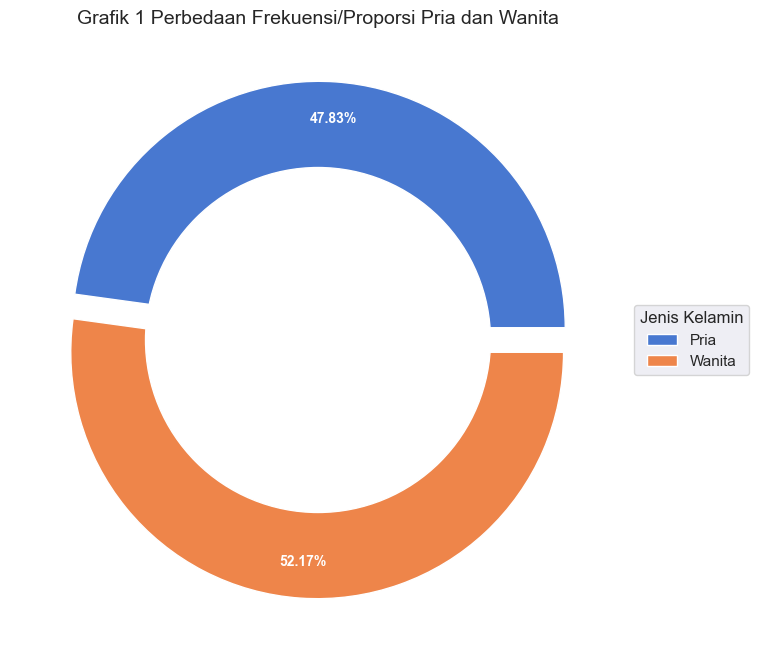

In [128]:
generate_donut(df_jk, 'Grafik 1 Perbedaan Frekuensi/Proporsi Pria dan Wanita', 'Jenis Kelamin')

<h2 style="color:#B8E8FC"> Nomor 2 </h2>
<p> Buat tabel frekuensi dan proporsi untuk jenis kelamin responden</p>

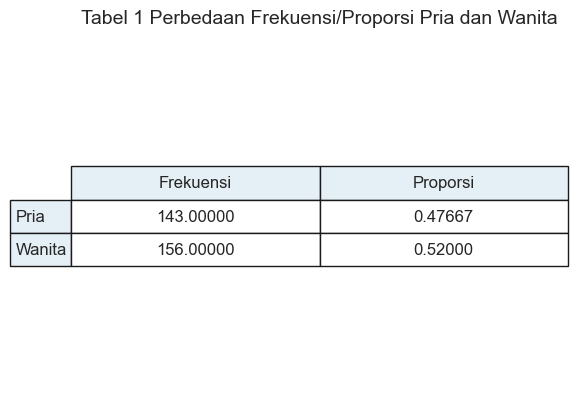

In [129]:
generate_table(df_jk, 'Tabel 1 Perbedaan Frekuensi/Proporsi Pria dan Wanita')

<h2 style="color:#B8E8FC"> Nomor 3 </h2>
<p> Buat histogram untuk data umur responden.</p>

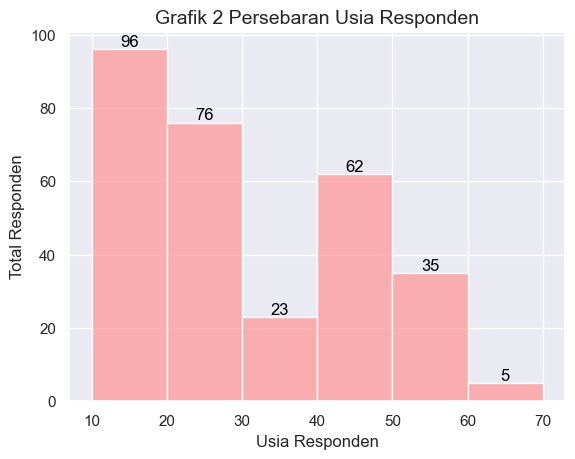

In [130]:
# Setup Seaborn
sns.set(color_codes=True)
sns.set(style="darkgrid", palette="muted")

# Generate Histogram
max_age = int(df[df["Usia"] < 100]["Usia"].max()) # Remove outliers
histogram = sns.histplot( # Generate Histogram
    data=df, 
    x="Usia", 
    bins=list(filter(lambda x:x % 10 == 0, range(1,max_age+10))),
    color="#ff9999")
histogram.set(xlabel='Usia Responden', ylabel='Total Responden')
histogram.set_title('Grafik 2 Persebaran Usia Responden', fontsize=14)
histogram.bar_label(histogram.containers[0], label_type='edge', color='black')
plt.show()

<h2 style="color:#B8E8FC"> Nomor 4 </h2>
<p> Buat boxplot untuk data umur responden.</p>

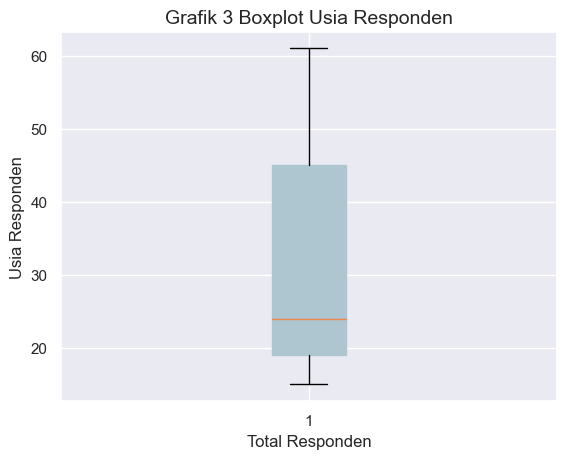

In [131]:
# Generate Boxplot
age = df.dropna(subset=['Usia']) # Remove NaN
age = age[age['Usia'] < 100] # Remove outliers

boxplot = plt.boxplot(age["Usia"], vert=True, patch_artist=True)
plt.ylabel('Usia Responden')
plt.xlabel('Total Responden')
plt.setp(boxplot['boxes'], color='#AEC6CF')
plt.setp(boxplot['whiskers'], color='black')
plt.title('Grafik 3 Boxplot Usia Responden', fontsize=14)
plt.show()

<h2 style="color:#B8E8FC"> Nomor 5 </h2>
<p> Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.</p>


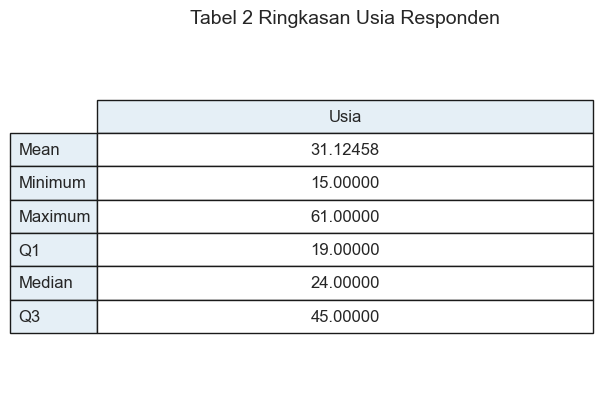

In [132]:
# Mean Age
mean_age = age["Usia"].mean()

# Minimum
min_age = age["Usia"].min()

# Maximum
max_age = age["Usia"].max()

# First Quartile
q1 = age["Usia"].quantile(0.25)

# Median Age
median_age = age["Usia"].median()

# Third Quartile
q3 = age["Usia"].quantile(0.75)


data = np.array([mean_age, min_age, max_age, q1, median_age, q3])
index = ['Mean', 'Minimum', 'Maximum', 'Q1', 'Median', 'Q3']
df_summary = pd.DataFrame(data, index=index, columns=['Usia'])

# Display
generate_table(df_summary, 'Tabel 2 Ringkasan Usia Responden')

<h2 style="color:#B8E8FC"> Nomor 6 </h2>
<p> Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR
atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)</p>

In [133]:
IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

outliers = df[(df["Usia"] < lower_bound) | (df["Usia"] > upper_bound)]
print("Jumlah Outlier: ",len(outliers))
display(outliers)

Jumlah Outlier:  1


,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
182,Wanita,14021976.0,S1,Ibu Rumah Tangga,NaN,Depok,NaN,Ya,Berbelanja online,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN


<p> Dengan asumsi bahwa data tidak di-clean terlebih dahulu sebelum pemrosesan, maka ada <span style="color:#FF6961">SATU Outlier</span> yang terdapat pada dataset </p>

<h2 style="color:#B8E8FC"> Nomor 7 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi profesi responden.</p>

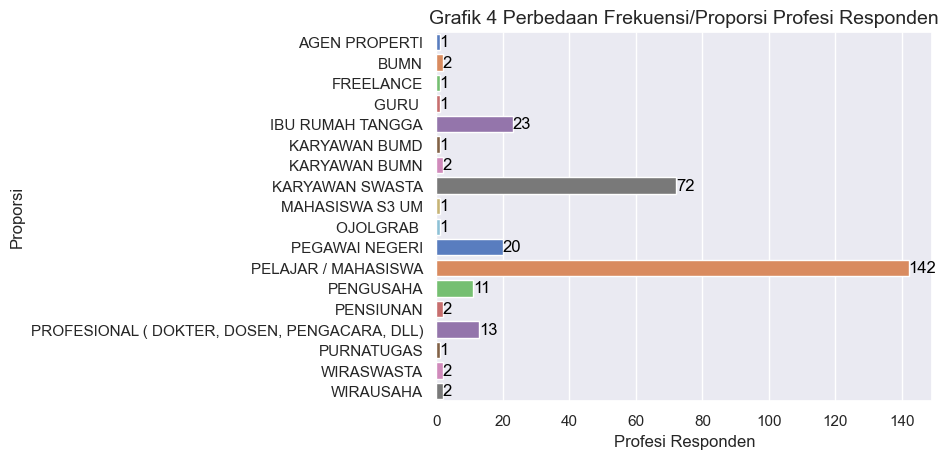

In [134]:
generate_bar(df_pk, 'Grafik 4 Perbedaan Frekuensi/Proporsi Profesi Responden', 'Profesi Responden')

<h2 style="color:#B8E8FC"> Nomor 8 </h2>
<p> Buat tabel frekuensi dan proporsi untuk profesi responden</p>

Tabel 3 Perbedaan Frekuensi/Proporsi Profesi Responden


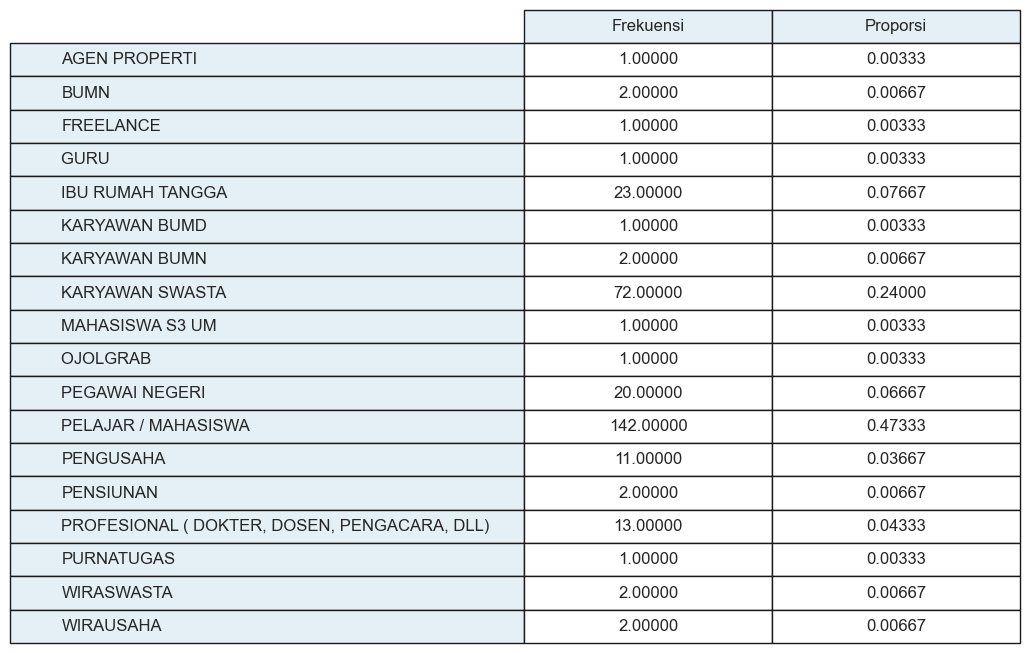

In [135]:
print("Tabel 3 Perbedaan Frekuensi/Proporsi Profesi Responden")
generate_table(df_pk)

<h2 style="color:#B8E8FC"> Nomor 9 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan
terakhir.</p>


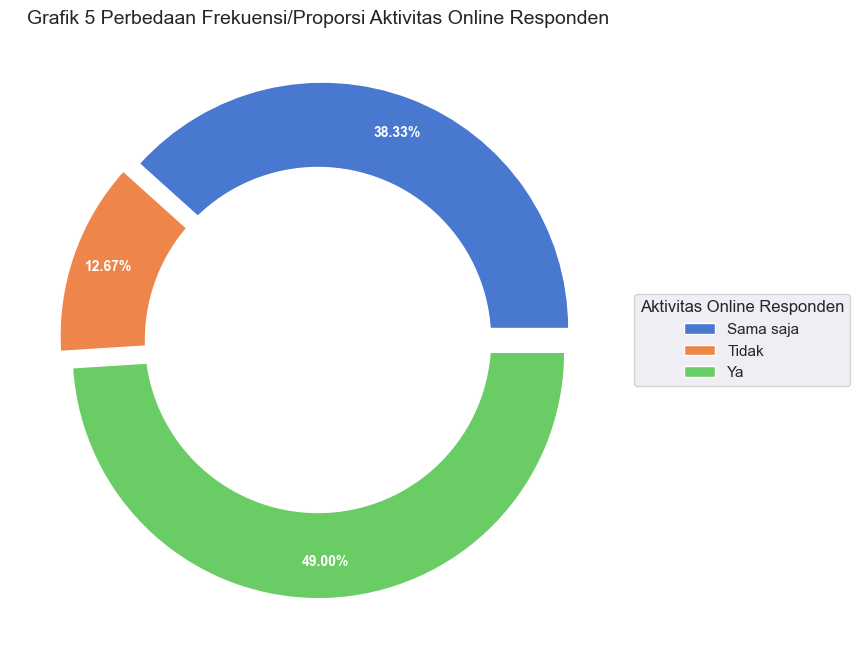

In [136]:
generate_donut(df_aom, "Grafik 5 Perbedaan Frekuensi/Proporsi Aktivitas Online Responden", "Aktivitas Online Responden")

<h2 style="color:#B8E8FC"> Nomor 10 </h2>
<p> Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat
atau tidak dalam 3 bulan terakhir.</p>



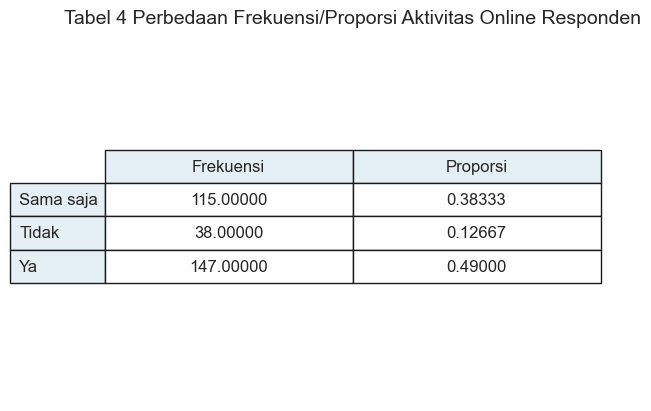

In [137]:
generate_table(df_aom, "Tabel 4 Perbedaan Frekuensi/Proporsi Aktivitas Online Responden")

<h2 style="color:#B8E8FC"> Nomor 11 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di
kolom bank_1 sampai bank_7</p>



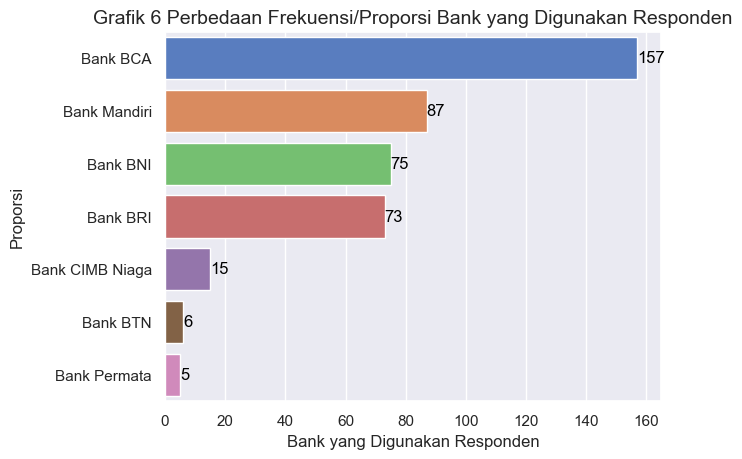

In [138]:
generate_bar(df_bank, "Grafik 6 Perbedaan Frekuensi/Proporsi Bank yang Digunakan Responden", "Bank yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 12 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai
bank_7.</p>

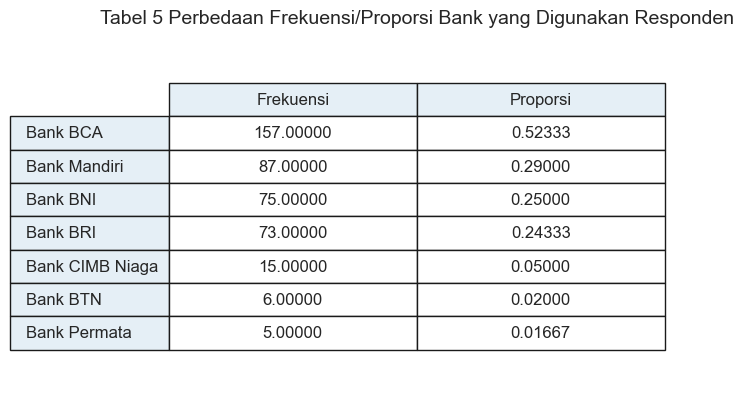

In [139]:
generate_table(df_bank, "Tabel 5 Perbedaan Frekuensi/Proporsi Bank yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 13 </h2>
<p> Hitung confidence interval 95% untuk proporsi pengguna Bank BCA:
... < Pbca <... </p>

In [140]:
total_bca = int(df_bank.loc["Bank BCA"]["Frekuensi"])
total_bank = int(len(df))
pBCA = total_bca / total_bank

alpha = 0.05
z_alphaper2 = st.norm.ppf(1-alpha/2)

lower_bound = pBCA - z_alphaper2*np.sqrt(pBCA*(1-pBCA)/total_bank)
upper_bound = pBCA + z_alphaper2*np.sqrt(pBCA*(1-pBCA)/total_bank)

print("Confidence Interval dari Bank BCA adalah {:.4f} < Proporsi Bank BCA < {:.4f}".format(lower_bound, upper_bound))

Confidence Interval dari Bank BCA adalah 0.4668 < Proporsi Bank BCA < 0.5799


<h2 style="color:#B8E8FC"> Nomor 14 </h2>
<p> Lakukan uji hipotesis berikut:</p>
<p>H0: pbca = 0.5</p>
<p>H1: pbca ≠ 0.5</p>
<p>alpha = 5%</p>

In [141]:
p0 = 0.5
z_value = ((total_bank * pBCA) - (total_bank *p0)) / np.sqrt(p0*(1-p0)*total_bank)
z_alphaper2 = st.norm.ppf(1-alpha/2)

print("Critical Region: Z < -{:.2f} | Z > {:.2f}".format(z_alphaper2,z_alphaper2))
print("Z-value: {:.4f}".format(z_value))

if not(z_value < -z_alphaper2 or z_value > z_alphaper2):
    print("Karena Z-value berada di luar Critical Region, maka hipotesis h0 gagal ditolak")
else:
    print("Karena Z-value berada di dalam Critical Region, maka hipotesis h0 berhasil ditolak")

pvalue = 2*(1-st.norm.cdf(abs(z_value)))
print ("P value : {:.8f}".format(pvalue))

Critical Region: Z < -1.96 | Z > 1.96
Z-value: 0.8083
Karena Z-value berada di luar Critical Region, maka hipotesis h0 gagal ditolak
P value : 0.41892344


<h2 style="color:#B8E8FC"> Nomor 15 </h2>
<p> Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi
channel yang dipilih responden untuk melakukan “Transfer antar bank”.</p>

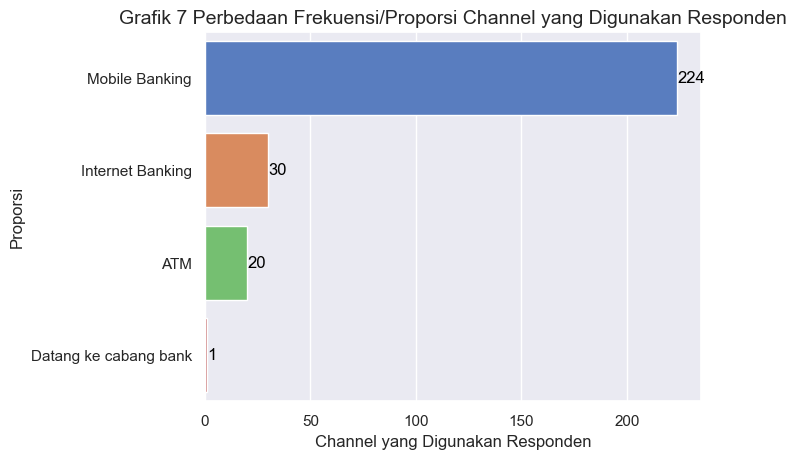

In [142]:
generate_bar(df_channel, "Grafik 7 Perbedaan Frekuensi/Proporsi Channel yang Digunakan Responden", "Channel yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 16 </h2>
<p> Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden
untuk melakukan “Transfer antar bank”.</p>

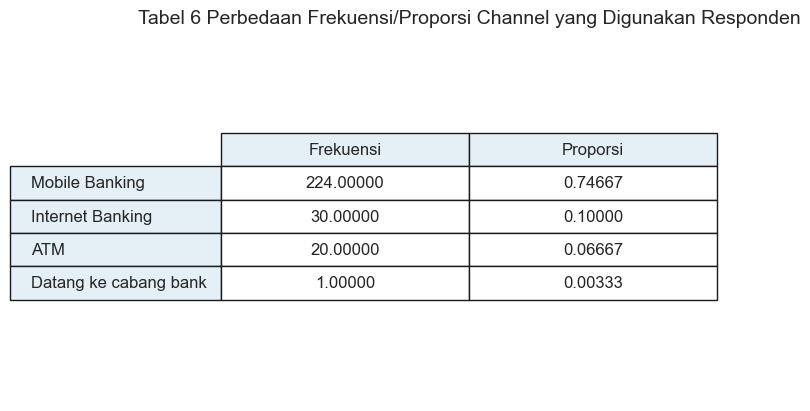

In [143]:
generate_table(df_channel, "Tabel 6 Perbedaan Frekuensi/Proporsi Channel yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 17 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di
kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)</p>

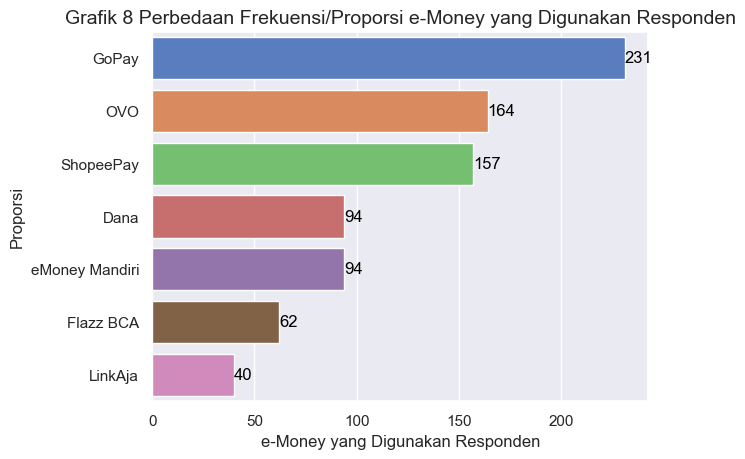

In [144]:
generate_bar(df_emoney, "Grafik 8 Perbedaan Frekuensi/Proporsi e-Money yang Digunakan Responden", "e-Money yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 18 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom
emoney_pilihan_1 sampai emoney_pilihan_7</p>

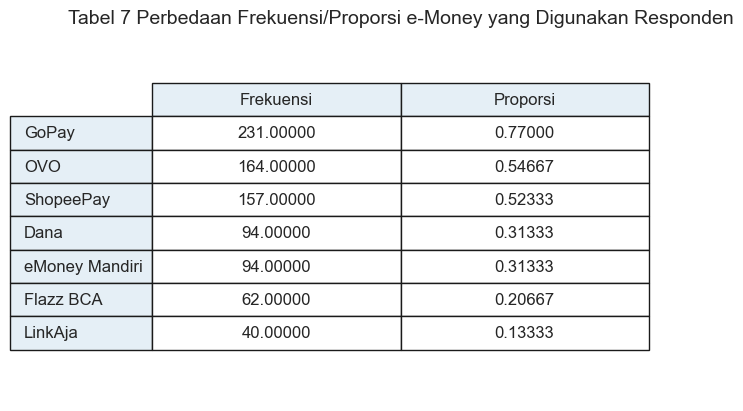

In [145]:
generate_table(df_emoney, "Tabel 7 Perbedaan Frekuensi/Proporsi e-Money yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 19 </h2>
<p> Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.
... < PGopay -POvo < ... </p>

In [146]:
pGOPAY = float(df_emoney.loc["GoPay"]["Proporsi"])
pOVO = float(df_emoney.loc["OVO"]["Proporsi"])

total_channel = int(len(df))
total_gopay = int(df_emoney.loc["GoPay"]["Frekuensi"])
total_ovo = int(df_emoney.loc["OVO"]["Frekuensi"])

alpha = 0.05
z_alphaper2 = st.norm.ppf(1-alpha/2)

error = z_alphaper2 * np.sqrt((pGOPAY*(1-pGOPAY)/total_channel) + (pOVO*(1-pOVO)/total_channel))
lower_bound = pGOPAY - pOVO - error
upper_bound = pGOPAY - pOVO + error
print("Confidence Interval dari Perbedaan Proporsi e-Money GoPay dan OVO adalah {:.4f} < Proporsi e-Money GoPay - Proporsi e-Money OVO < {:.4f}".format(lower_bound, upper_bound))

Confidence Interval dari Perbedaan Proporsi e-Money GoPay dan OVO adalah 0.1496 < Proporsi e-Money GoPay - Proporsi e-Money OVO < 0.2971


<h2 style="color:#B8E8FC"> Nomor 20 </h2>
<p> Lakukan uji hipotesis berikut:</p>
<p>H0: PGopay = POvo</p>
<p>H1: PGopay ≠ POvo</p>
<p>alpha = 5%</p>

In [147]:
pHat = (total_gopay + total_ovo) / (total_channel*2)
print(pHat)
z_alphaper2 = st.norm.ppf(1-alpha/2)
z_value = (pGOPAY - pOVO - 0) / np.sqrt(pHat*(1-pHat)*((1/total_gopay)+(1/total_ovo)))

print("Critical Region: Z < -{:.2f} | Z > {:.2f}".format(z_alphaper2,z_alphaper2))
print("Z-value: {:.4f}".format(z_value))

if not(z_value < -z_alphaper2 or z_value > z_alphaper2):
    print("Karena Z-value berada di luar Critical Region, maka hipotesis gagal ditolak")
else:
    print("Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak")

pvalue = 2*(1-st.norm.cdf(abs(z_value)))
print ("P value : {:.9f}".format(pvalue))

0.6583333333333333
Critical Region: Z < -1.96 | Z > 1.96
Z-value: 4.6117
Karena Z-value berada di dalam Critical Region, maka hipotesis berhasil ditolak
P value : 0.000003994


<h2 style="color:#B8E8FC"> Nomor 21 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk nominal yang biasa dipakai untuk top up emoney.</p>

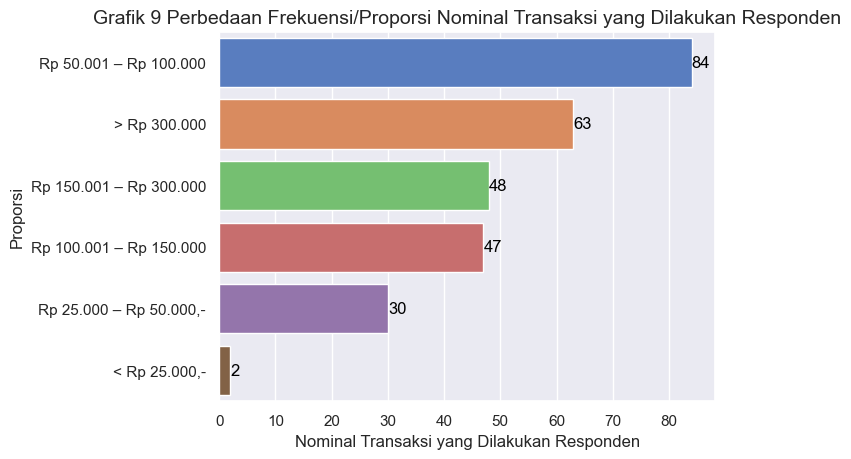

In [148]:
generate_bar(df_nominal, "Grafik 9 Perbedaan Frekuensi/Proporsi Nominal Transaksi yang Dilakukan Responden", "Nominal Transaksi yang Dilakukan Responden")

<h2 style="color:#B8E8FC"> Nomor 22 </h2>
<p> Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up
emoney.</p>

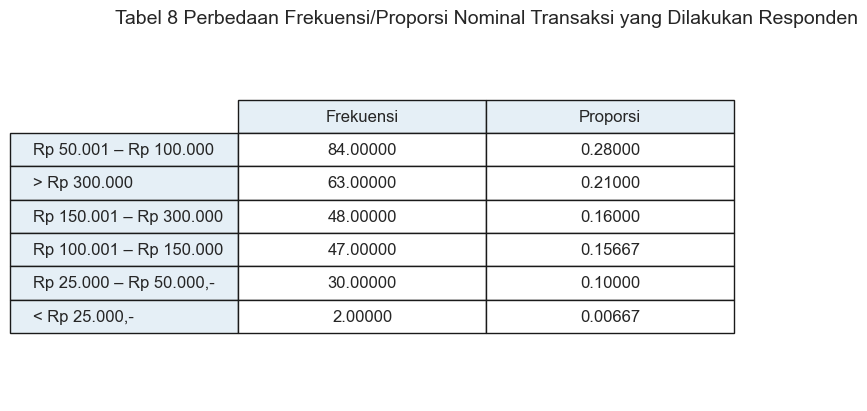

In [149]:
generate_table(df_nominal, "Tabel 8 Perbedaan Frekuensi/Proporsi Nominal Transaksi yang Dilakukan Responden")

<h2 style="color:#B8E8FC"> Nomor 23 </h2>
<p> Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada
di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)</p>

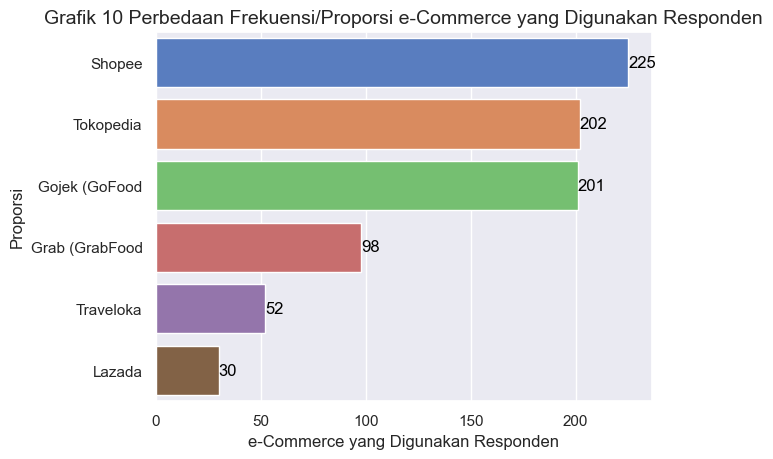

In [150]:
generate_bar(df_ecom, "Grafik 10 Perbedaan Frekuensi/Proporsi e-Commerce yang Digunakan Responden", "e-Commerce yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 24 </h2>
<p> Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom
ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)</p>

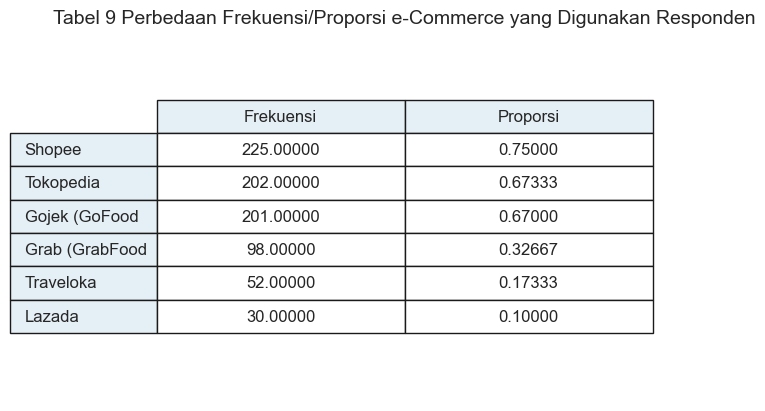

In [151]:
generate_table(df_ecom, "Tabel 9 Perbedaan Frekuensi/Proporsi e-Commerce yang Digunakan Responden")

<h2 style="color:#B8E8FC"> Nomor 25 </h2>
<p> Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk responden yang prefer beli handphone secara offline vs online</p>


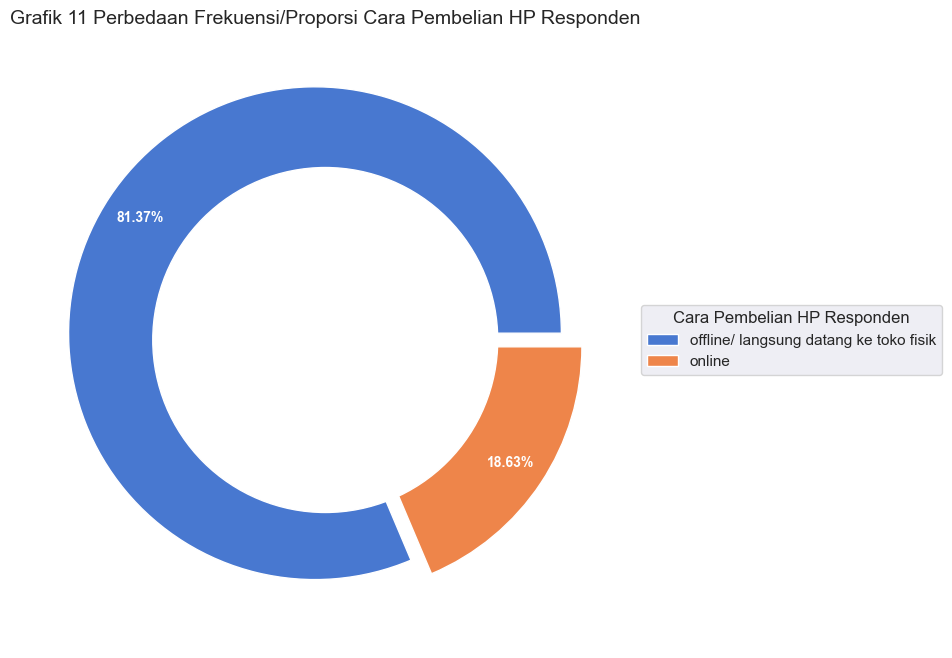

In [152]:
generate_donut(df_hp, "Grafik 11 Perbedaan Frekuensi/Proporsi Cara Pembelian HP Responden", "Cara Pembelian HP Responden")

<h2 style="color:#B8E8FC"> Nomor 26 </h2>
<p> Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara
offline vs online </p>


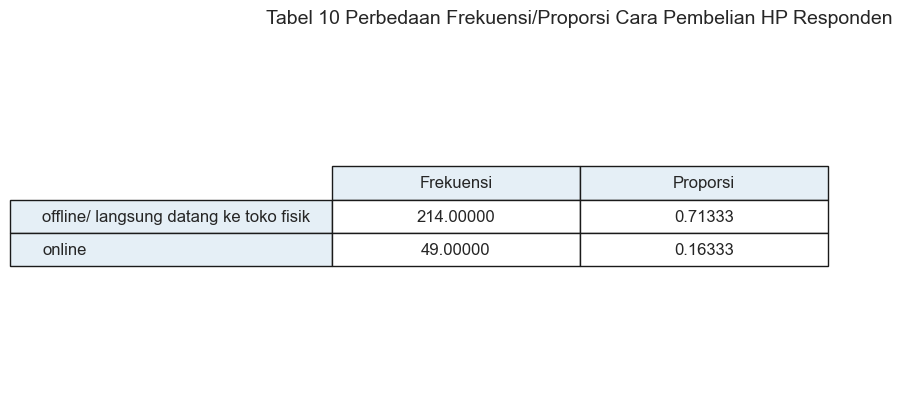

In [153]:
generate_table(df_hp, "Tabel 10 Perbedaan Frekuensi/Proporsi Cara Pembelian HP Responden")

<h2 style="color:#B8E8FC"> Nomor 27 </h2>
<p>Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk tempat beli makanan online yang pilihan responden</p>



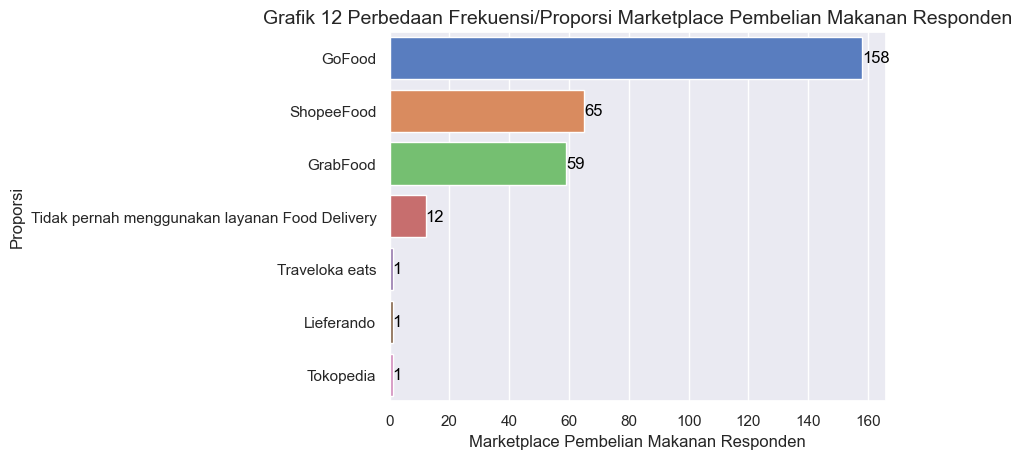

In [154]:
generate_bar(df_makan, "Grafik 12 Perbedaan Frekuensi/Proporsi Marketplace Pembelian Makanan Responden", "Marketplace Pembelian Makanan Responden")

<h2 style="color:#B8E8FC"> Nomor 28 </h2>
<p>Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan
responden</p>



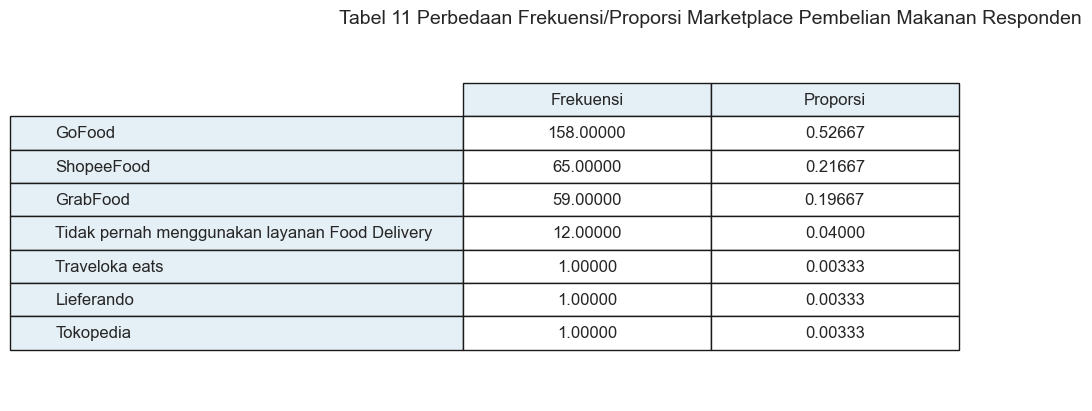

In [155]:
generate_table(df_makan, "Tabel 11 Perbedaan Frekuensi/Proporsi Marketplace Pembelian Makanan Responden")

<h2 style="color:#B8E8FC"> Nomor 29 </h2>
<p> Lakukan One Way ANOVA Test berikut:</p>
<p>H0: Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood</p>
<p>H1: Setidaknya ada dua grup yang memiliki mean umur yang berbeda</p>
<p>Alpha: 5%</p>






In [156]:
layanan = ["GoFood", "GrabFood", "ShopeeFood"]
anova = df_anova.loc[df_anova['layanan_delivery'].isin(layanan)]
models = ols('Usia ~ C(layanan_delivery)', data=anova).fit()
anova_table = sm.stats.anova_lm(models, typ=1)
print("Tabel Analisis Variansi (ANOVA) untuk Layanan Delivery\n")
print(anova_table)

Tabel Analisis Variansi (ANOVA) untuk Layanan Delivery

                        df        sum_sq      mean_sq          F    PR(>F)
C(layanan_delivery)    2.0   3793.390807  1896.695404  10.938351  0.000027
Residual             276.0  47858.028547   173.398654        NaN       NaN


In [157]:
f = anova_table["F"][0]
crit_region = st.f.ppf(1-alpha, anova_table["df"][0], anova_table["df"][1])
print("f: {:.4f}".format(f))
print("Critical Region: F > {:.4f}".format(crit_region))

if f > crit_region:
    print("Karena F-value berada di dalam Critical Region, maka hipotesis h0 berhasil ditolak")
else:
    print("Karena F-value berada di luar Critical Region, maka hipotesis h0 gagal ditolak")

pvalue = 1-st.f.cdf(f, anova_table["df"][0], anova_table["df"][1])
print("P-value: {:.5f}".format(pvalue))


f: 10.9384
Critical Region: F > 3.0285
Karena F-value berada di dalam Critical Region, maka hipotesis h0 berhasil ditolak
P-value: 0.00003


<h2 style="color:#B8E8FC"> Nomor 30 </h2>
<p> Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden. </p>

In [158]:
print("Insight yang didapatkan dari hasil analisis data adalah:")
print(f"""
1. Dari hasil survey terhadap {len(df)} Responden, dapat disimpulkan bahwa sebagian besar Responden adalah mahasiswa yang berusia 10-20 tahun (Generasi Z) dengan jumlah 96 Responden atau sebesar {96/300*100:.0f}% dari total Responden.
Data ini didasarkan dari Grafik 2 mengenai persebaran usia responden.

2. Demografi dari survey ini cenderung didominasi oleh Pelajar/Mahasiswa dengan jumlah {df_pk["Frekuensi"]["PELAJAR / MAHASISWA"]} Responden atau sebesar {df_pk["Frekuensi"]["PELAJAR / MAHASISWA"]/300*100:.2f}% dari total Responden.
Data ini didasarkan dari Tabel 3 mengenai Frekuensi/Proporsi Profesi Responden.

3. Selama 3 bulan terakhir, Aktivitas online cenderung meningkat diantara {df_aom["Frekuensi"]["Ya"]} Responden atau sebesar {df_aom["Frekuensi"]["Ya"]/300*100:.0f}% dari total Responden.
Data ini didasarkan dari Grafik 5 mengenai Frekuensi/Proporsi Aktivitas Online Responden.

4. Sampel Data ini tidak cukup untuk membuktikan bahwa Proporsi pengguna GoPay sama dengan Proporsi Pengguna OVO. Hal ini dikarenakan dalam tingkat signifikansi 5%, nilai p-value = 1.5615 dari Uji Hipotesis lebih besar dari Tingkat Signifikansi.

5. Responden cenderung lebih prefer untuk menggunakan Mobile Banking dibanding metode lainnya untuk melakukan transfer antar bank.
Persentasenya sendiri sekitar {224/300*100:.2f}% membuat Mobile Banking menjadi metode transfer antar bank yang paling banyak digunakan disusul oleh internet banking dengan {30/300*100:.0f}%.

6. GoPay masih menjadi Sistem Pembayaran yang paling diminati dengan jumlah {df_emoney["Frekuensi"]["GoPay"]:.0f} Responden atau sebesar {df_emoney["Frekuensi"]["GoPay"]/300*100:.0f}% dari total Responden.

7. Berdasarkan uji Analisis Variansi, Sampel data ini cukup untuk membuktikan bahwa hipotesis mengenai rata-rata umur pengguna GoFood, ShopeeFood, dan GrabFood berbeda. Dengan demikian, Sampel ini bisa dikatakan dapat merepresentasikan populasi dengan baik.

8. GoFood masih mendominasi pasar dengan jumlah {df_makan["Frekuensi"]["GoFood"]:.0f} Responden atau sebesar {df_makan["Frekuensi"]["GoFood"]/300*100:.2f}% dari total Responden.
""")

Insight yang didapatkan dari hasil analisis data adalah:

1. Dari hasil survey terhadap 300 Responden, dapat disimpulkan bahwa sebagian besar Responden adalah mahasiswa yang berusia 10-20 tahun (Generasi Z) dengan jumlah 96 Responden atau sebesar 32% dari total Responden.
Data ini didasarkan dari Grafik 2 mengenai persebaran usia responden.

2. Demografi dari survey ini cenderung didominasi oleh Pelajar/Mahasiswa dengan jumlah 142 Responden atau sebesar 47.33% dari total Responden.
Data ini didasarkan dari Tabel 3 mengenai Frekuensi/Proporsi Profesi Responden.

3. Selama 3 bulan terakhir, Aktivitas online cenderung meningkat diantara 147 Responden atau sebesar 49% dari total Responden.
Data ini didasarkan dari Grafik 5 mengenai Frekuensi/Proporsi Aktivitas Online Responden.

4. Sampel Data ini tidak cukup untuk membuktikan bahwa Proporsi pengguna GoPay sama dengan Proporsi Pengguna OVO. Hal ini dikarenakan dalam tingkat signifikansi 5%, nilai p-value = 1.5615 dari Uji Hipotesis lebih b